## import the cleaning data

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
df_ventes=pd.read_csv("./Data/DataClean/df_ventes.csv")
df_produits=pd.read_csv("./Data/DataClean/df_produits.csv")
df_clients=pd.read_csv("./Data/DataClean/df_clients.csv")
df_ventes = df_ventes.drop(columns=['Unnamed: 0'])
df_clients = df_clients.drop(columns=['Unnamed: 0'])
df_produits = df_produits.drop(columns=['Unnamed: 0'])
df_ventes = df_ventes.rename(columns={'id_prod': 'product_id'})



## Data Preparation


In [26]:
df_ventes = df_ventes.rename(columns={'id_prod': 'product_id'})

df_ventes_produits = pd.merge(df_ventes, df_produits, on='product_id', how='left')

df_ventes_produits['date'] = pd.to_datetime(df_ventes_produits['date'])

df_ventes_produits['revenue'] = df_ventes_produits['quantity_sold'] * df_ventes_produits['price']


In [27]:
df_ventes_produits

,product_id,date,session_id,client_id,quantity_sold,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_hour,transaction_period,category,sub_category,price,stock_quantity,revenue
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,2021,4,10,Saturday,18,Evening,Vêtements,T-shirts,4.99,48,24.95
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,2022,2,3,Thursday,1,Night,Montres,Montres connectées,65.75,63,394.50
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,2021,9,23,Thursday,15,Afternoon,Accessoires,Sacs à main,10.71,97,32.13
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,2021,10,17,Sunday,3,Night,Vêtements,T-shirts,4.20,57,33.60
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,2021,7,17,Saturday,20,Evening,Vêtements,T-shirts,8.99,59,17.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1,2021,5,28,Friday,12,Afternoon,Accessoires,Sacs à main,31.99,13,31.99
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10,2021,6,19,Saturday,0,Night,Vêtements,T-shirts,22.99,65,229.90
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7,2021,3,16,Tuesday,17,Evening,Vêtements,T-shirts,11.03,13,77.21
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8,2021,10,30,Saturday,16,Afternoon,Montres,Montres connectées,50.99,94,407.92


## DATA VIZ

#### Sales Overview

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\535994510.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=sales_revenue, palette='viridis')


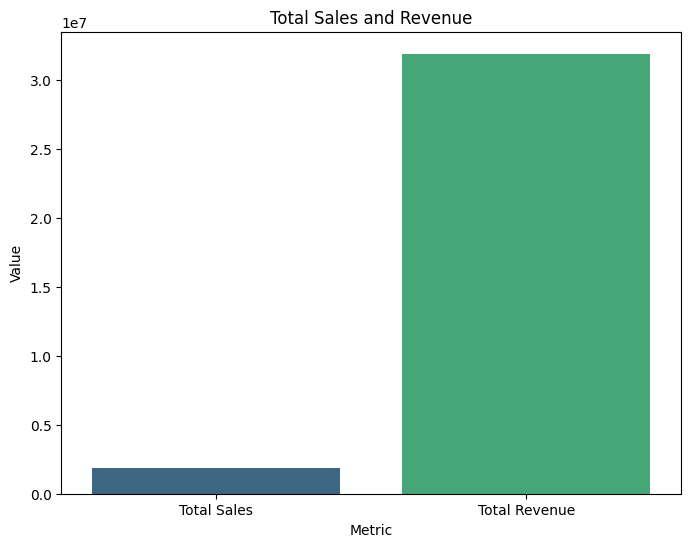

In [28]:
total_sales = df_ventes_produits['quantity_sold'].sum()
total_revenue = df_ventes_produits['revenue'].sum()

sales_revenue = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Revenue'],
    'Value': [total_sales, total_revenue]
})

plt.figure(figsize=(8,6))
sns.barplot(x='Metric', y='Value', data=sales_revenue, palette='viridis')
plt.title('Total Sales and Revenue')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\2385918124.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_ventes_produits.set_index('date').resample('M').sum().reset_index()


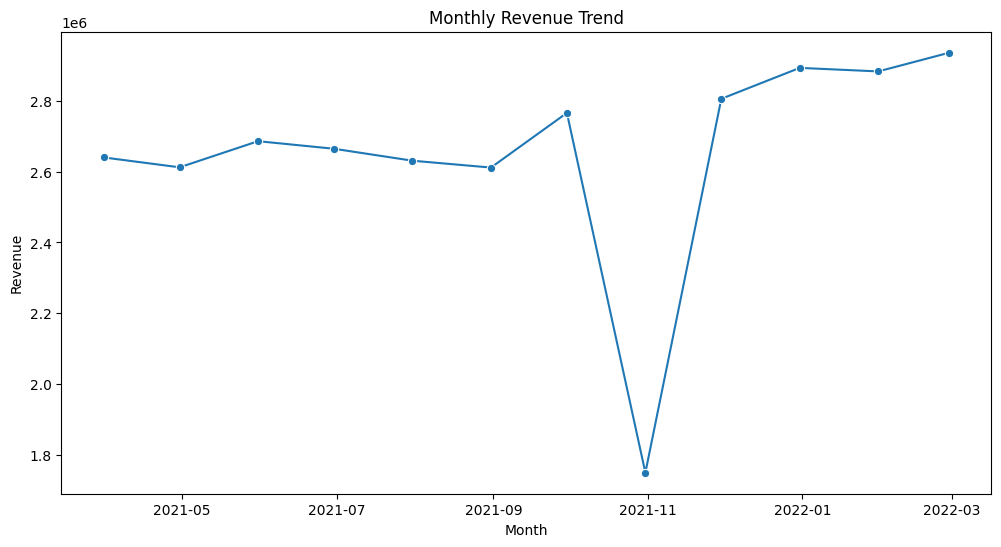

In [29]:
##  Monthly Sales Trend
df_monthly = df_ventes_produits.set_index('date').resample('M').sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='revenue', data=df_monthly, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\1610541587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='category', data=category_sales, palette='magma')


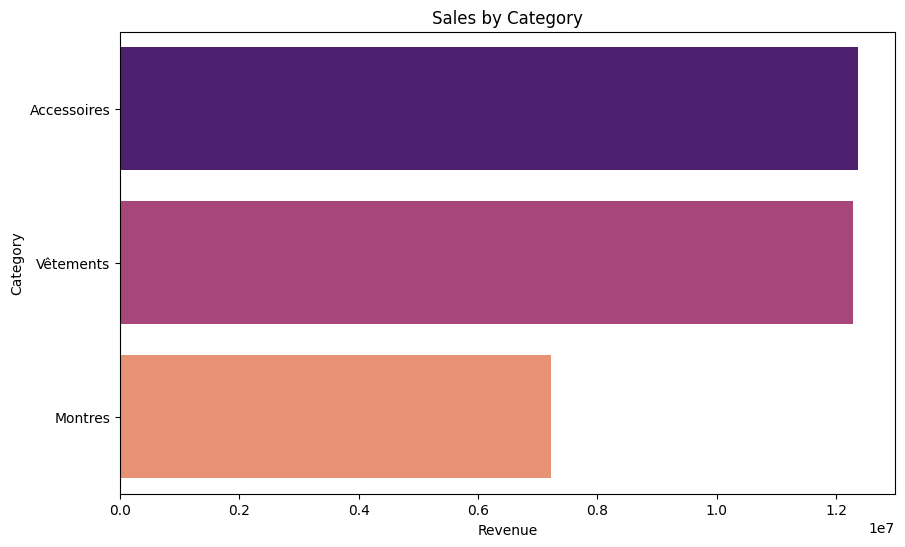

In [31]:

## Sales by Category

category_sales = df_ventes_produits.groupby('category')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='category', data=category_sales, palette='magma')
plt.title('Sales by Category')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\986116592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='sub_category', data=sub_category_sales, palette='coolwarm')


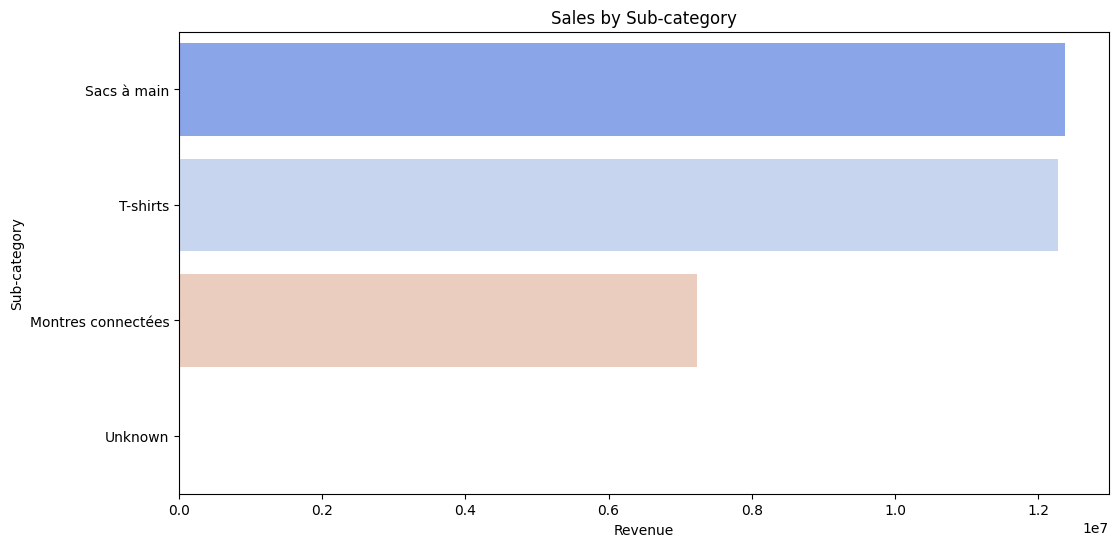

In [32]:
## Sales by Sub-category
sub_category_sales = df_ventes_produits.groupby('sub_category')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='revenue', y='sub_category', data=sub_category_sales, palette='coolwarm')
plt.title('Sales by Sub-category')
plt.xlabel('Revenue')
plt.ylabel('Sub-category')
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_72188\1932072179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_id', data=top_products, palette='deep')


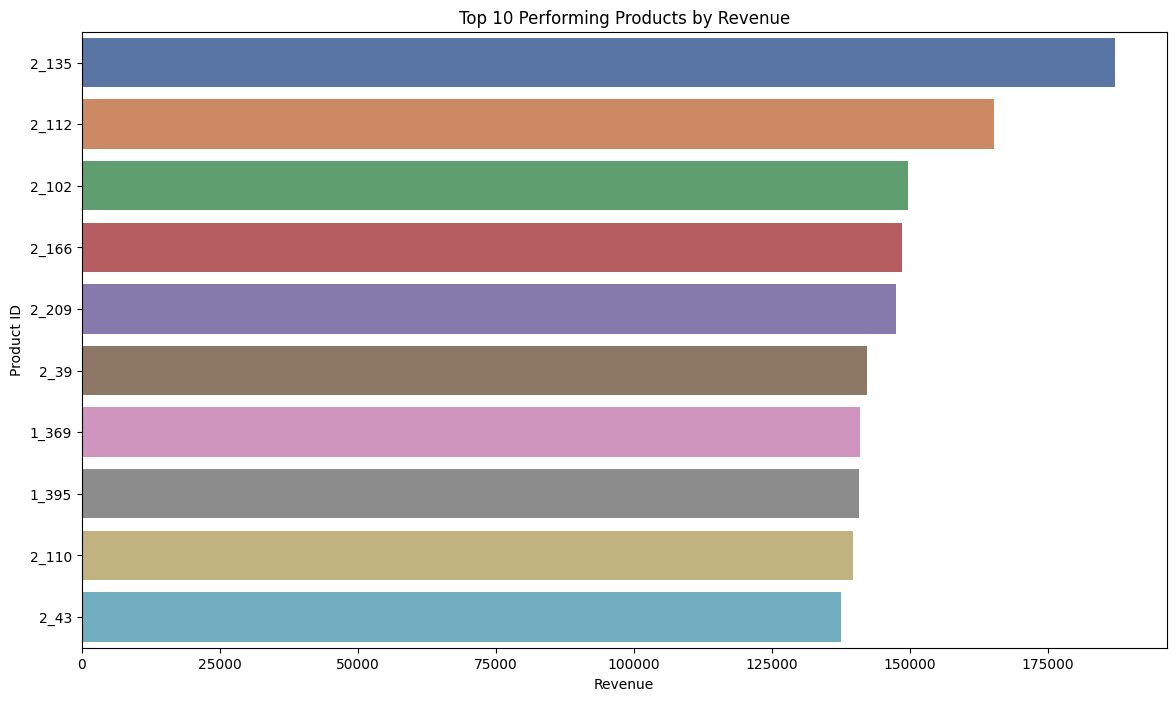

In [33]:
## Top Performing Products
top_products = df_ventes_produits.groupby('product_id')['revenue'].sum().reset_index().sort_values('revenue', ascending=False).head(10)
top_products = pd.merge(top_products, df_produits[['product_id', 'category', 'sub_category']], on='product_id', how='left')

plt.figure(figsize=(14,8))
sns.barplot(x='revenue', y='product_id', data=top_products, palette='deep')
plt.title('Top 10 Performing Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product ID')
plt.show()


####  Product Performance

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\1024633504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity_sold', y='product_id', data=sales_per_product.sort_values('quantity_sold', ascending=False).head(20), palette='pastel')


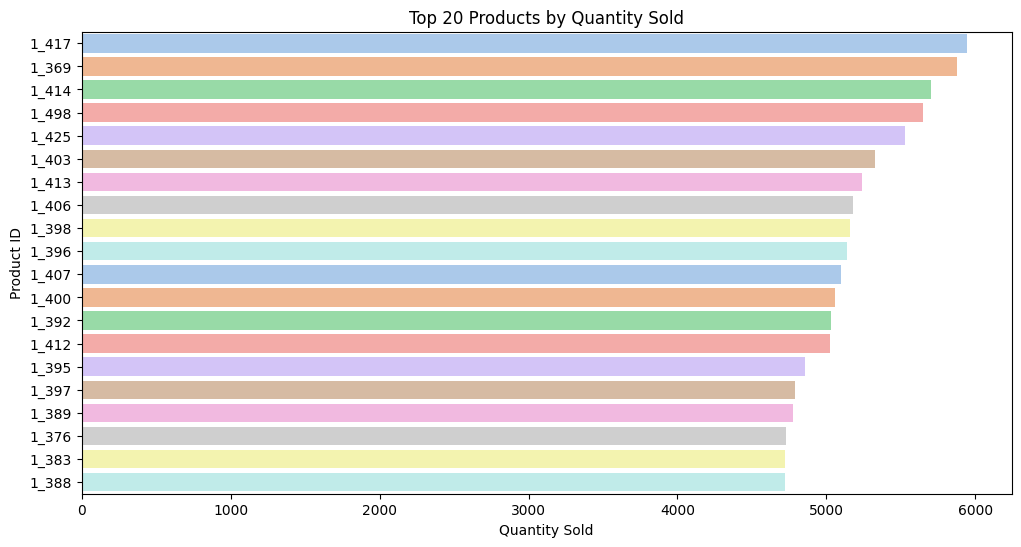

In [34]:
## Sales per Product
sales_per_product = df_ventes_produits.groupby('product_id').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='quantity_sold', y='product_id', data=sales_per_product.sort_values('quantity_sold', ascending=False).head(20), palette='pastel')
plt.title('Top 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product ID')
plt.show()


## 

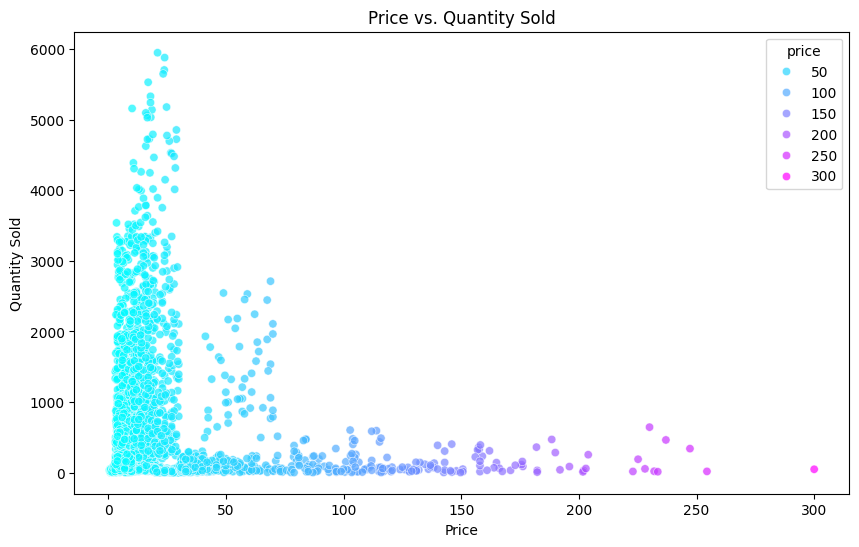

In [37]:
## Price vs. Quantity Sold
price_quantity = df_ventes_produits.groupby('product_id').agg({
    'price': 'mean',
    'quantity_sold': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='quantity_sold', data=price_quantity, hue='price', palette='cool', alpha=0.7)
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\418701623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='revenue', data=category_performance, palette='Set2')


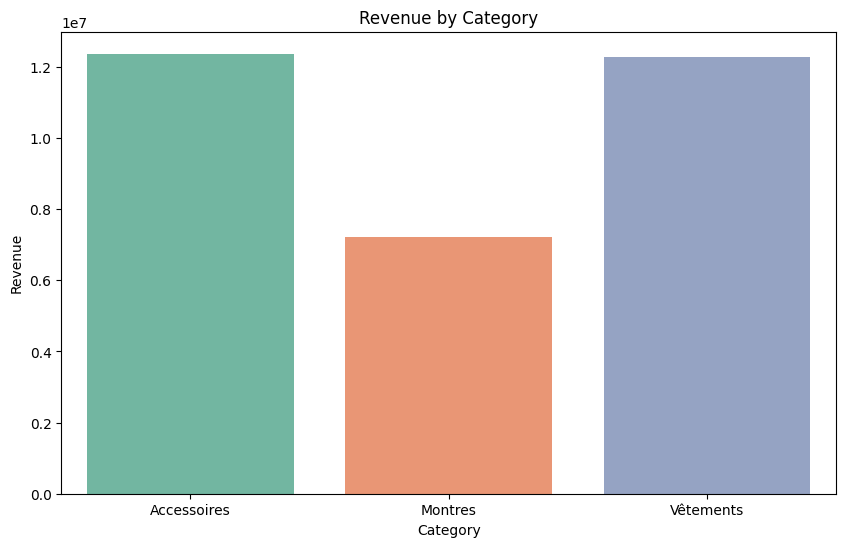

In [39]:
## Category Analysis

category_performance = df.groupby('category').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='category', y='revenue', data=category_performance, palette='Set2')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\302234402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='revenue', data=sub_category_performance.sort_values('revenue', ascending=False), palette='Set3')


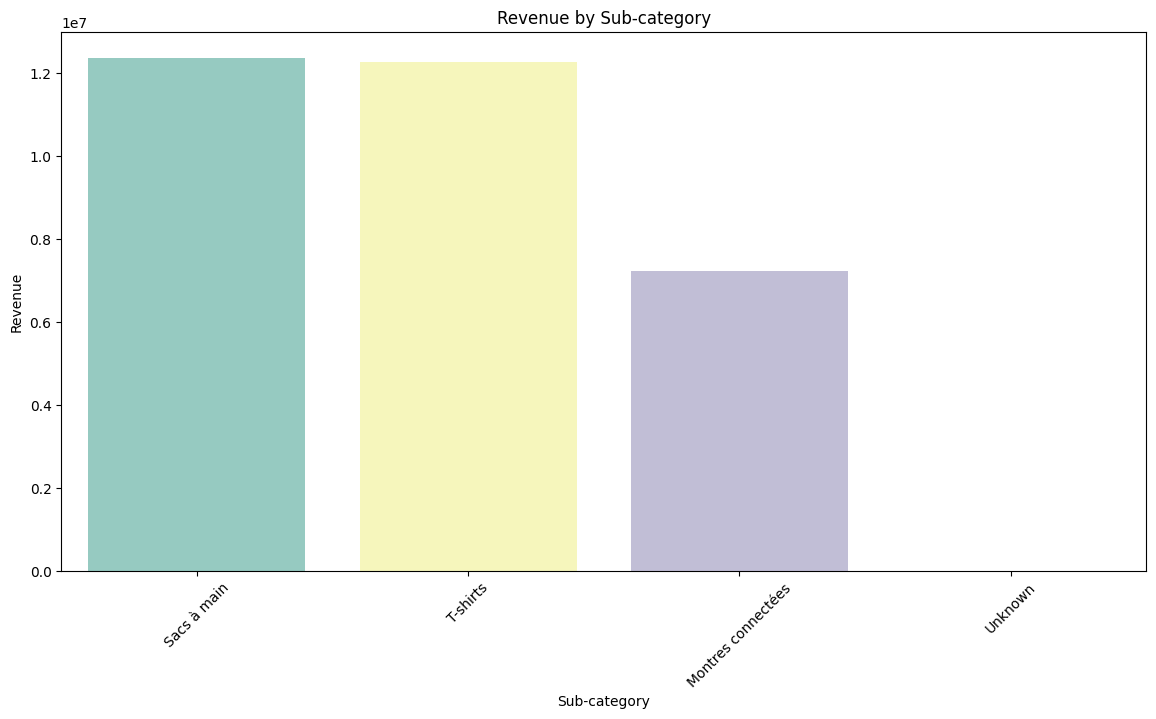

In [41]:
## Sub-category Analysis
sub_category_performance = df_ventes_produits.groupby('sub_category').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum'
}).reset_index()

plt.figure(figsize=(14,7))
sns.barplot(x='sub_category', y='revenue', data=sub_category_performance.sort_values('revenue', ascending=False), palette='Set3')
plt.title('Revenue by Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


#### Time Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\3257913456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_weekday', y='revenue', data=day_sales, palette='Blues_d')


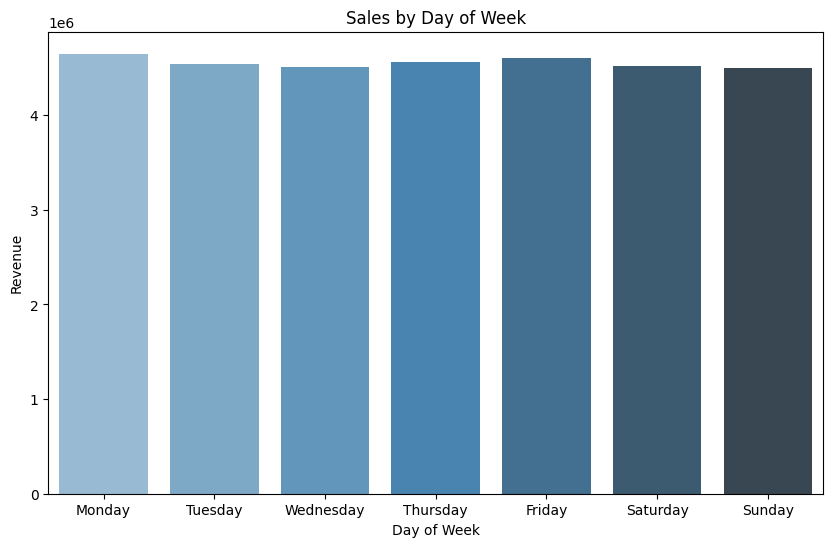

In [45]:
###  Sales by Day of Week
day_sales = df_produits.groupby('transaction_weekday')['revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='transaction_weekday', y='revenue', data=day_sales, palette='Blues_d')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\571498568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_hour', y='revenue', data=hour_sales, palette='viridis')


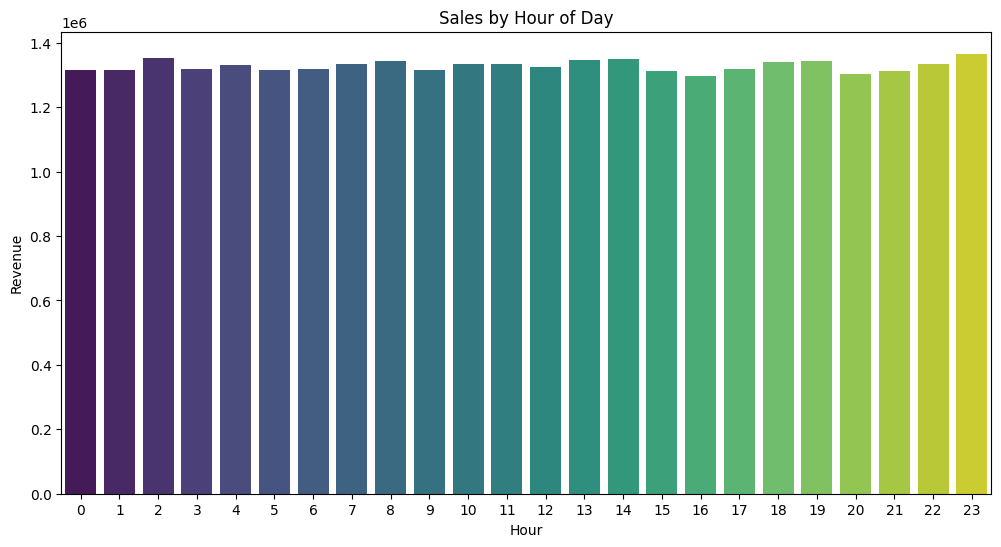

In [48]:
## Sales by Hour/Period of Day

hour_sales = df_ventes_produits.groupby('transaction_hour')['revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='transaction_hour', y='revenue', data=hour_sales, palette='viridis')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.show()


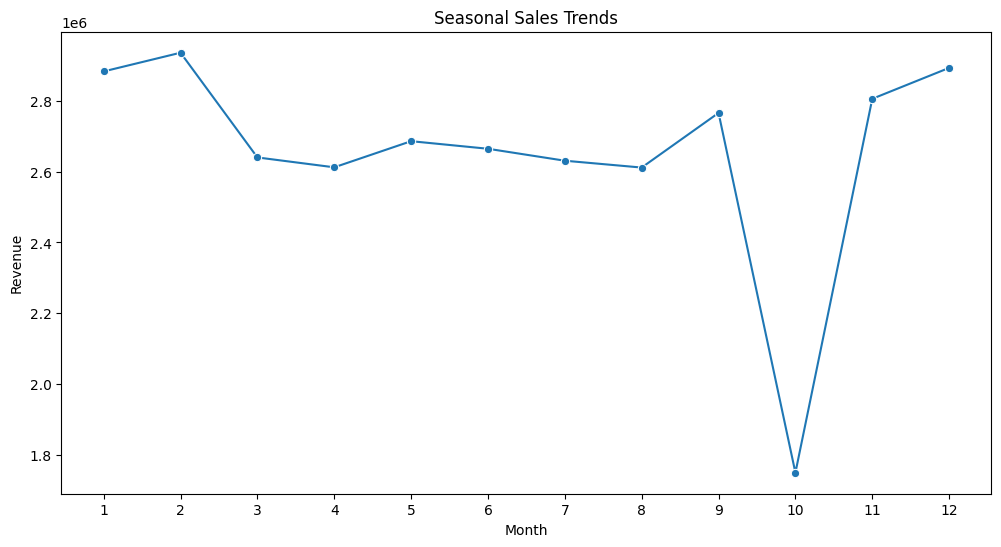

In [49]:
## Seasonal Trends

df_ventes_produits['month'] = df_ventes_produits['date'].dt.month
month_sales = df_ventes_produits.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='revenue', data=month_sales, marker='o')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1,13))
plt.show()


#### Inventory Management

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\3337157516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='turnover_rate', y='product_id', data=inventory_turnover.sort_values('turnover_rate', ascending=False).head(20), palette='Purples')


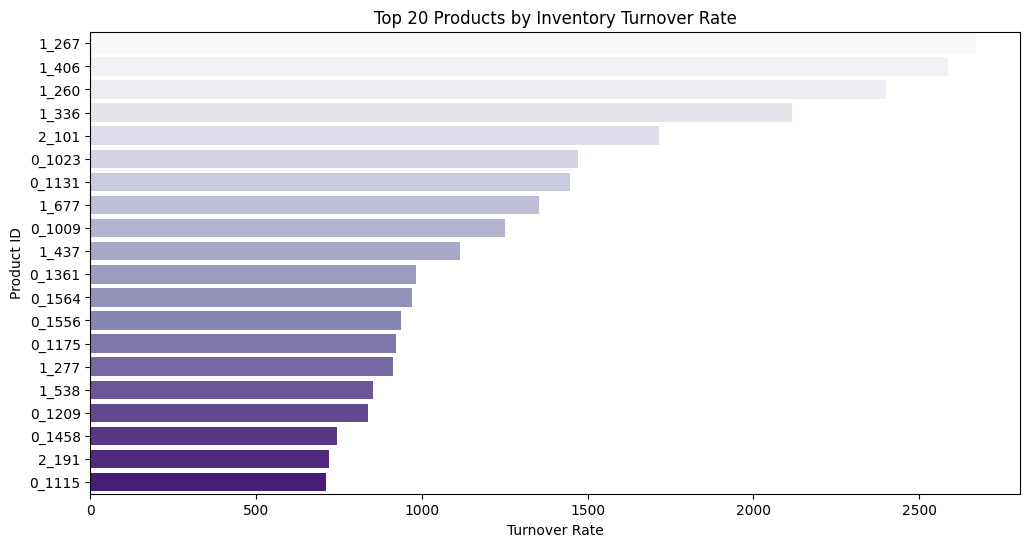

In [52]:
inventory_turnover = df_ventes_produits.groupby('product_id').agg({
    'quantity_sold': 'sum',
    'stock_quantity': 'mean'
}).reset_index()

inventory_turnover['turnover_rate'] = inventory_turnover['quantity_sold'] / inventory_turnover['stock_quantity']

plt.figure(figsize=(12,6))
sns.barplot(x='turnover_rate', y='product_id', data=inventory_turnover.sort_values('turnover_rate', ascending=False).head(20), palette='Purples')
plt.title('Top 20 Products by Inventory Turnover Rate')
plt.xlabel('Turnover Rate')
plt.ylabel('Product ID')
plt.show()


#### Custom Reports and Filters

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\2184977829.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_id', data=top_products_category, palette='inferno')


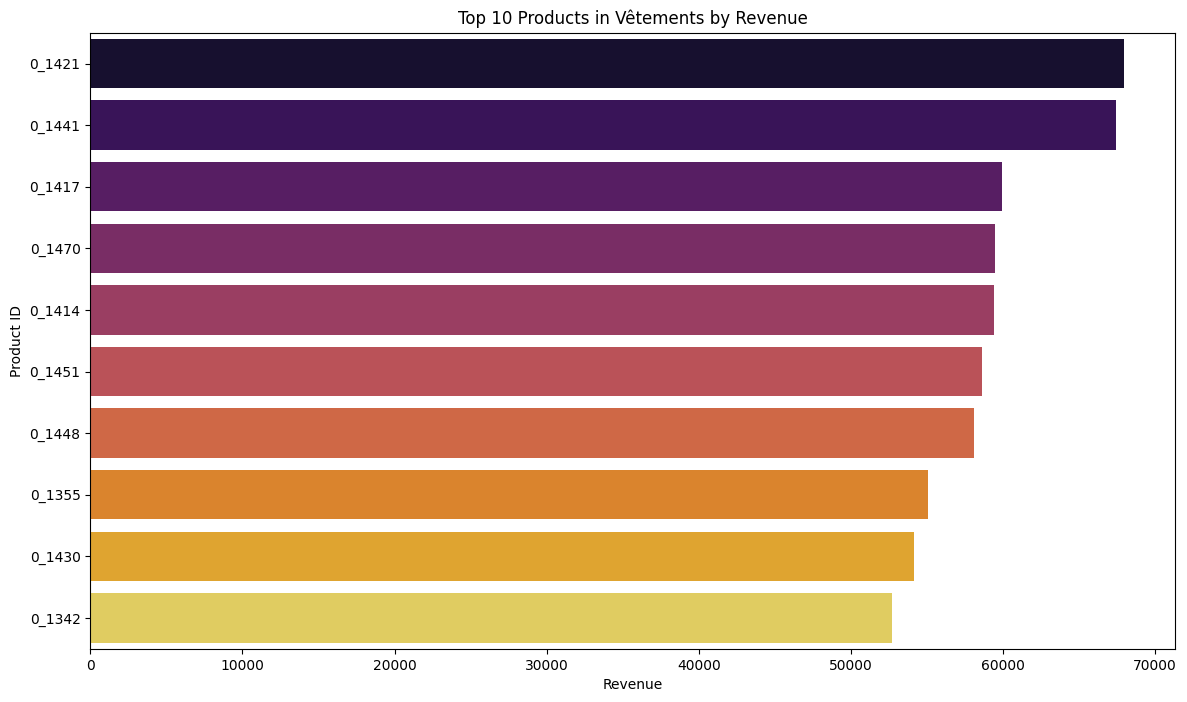

In [54]:
# Example: Drill down to top products in a selected category
selected_category = 'Vêtements'  # This can be dynamically set in an interactive environment

filtered_data = df_ventes_produits[df_ventes_produits['category'] == selected_category]
top_products_category = filtered_data.groupby('product_id')['revenue'].sum().reset_index().sort_values('revenue', ascending=False).head(10)
top_products_category = pd.merge(top_products_category, df_produits[['product_id', 'sub_category']], on='product_id', how='left')

plt.figure(figsize=(14,8))
sns.barplot(x='revenue', y='product_id', data=top_products_category, palette='inferno')
plt.title(f'Top 10 Products in {selected_category} by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product ID')
plt.show()


#### Comparison

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\106565361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='category', data=category_sales, palette='viridis')


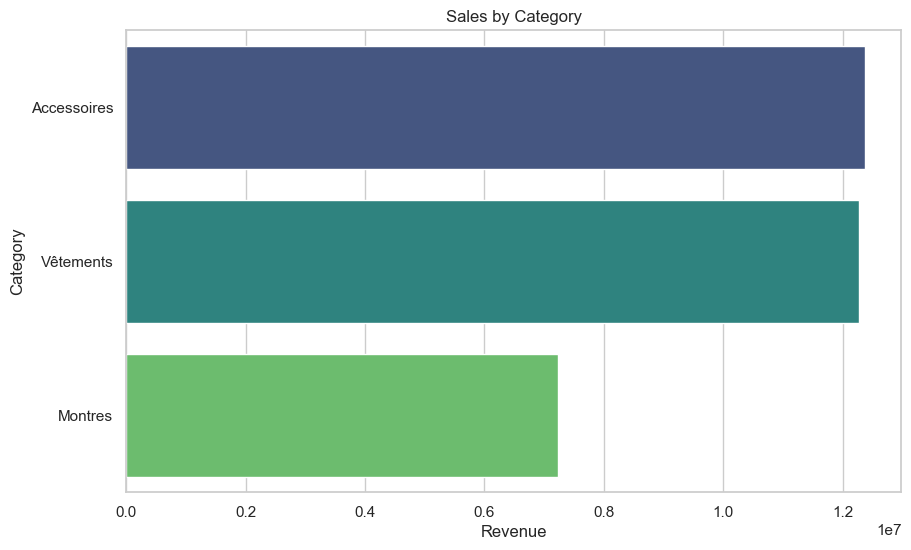

In [56]:
category_sales = df_ventes_produits.groupby('category')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='category', data=category_sales, palette='viridis')
plt.title('Sales by Category')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\484498413.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_ventes_produits.set_index('date').resample('M').sum().reset_index()


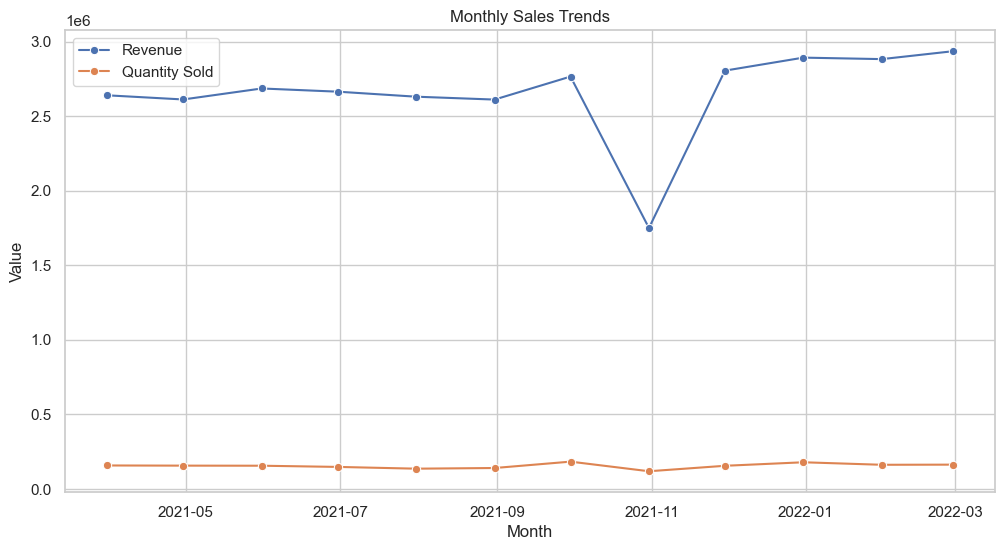

In [57]:
##Track Sales Trends Over Time
df_monthly = df_ventes_produits.set_index('date').resample('M').sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='revenue', data=df_monthly, marker='o', label='Revenue')
sns.lineplot(x='date', y='quantity_sold', data=df_monthly, marker='o', label='Quantity Sold')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()


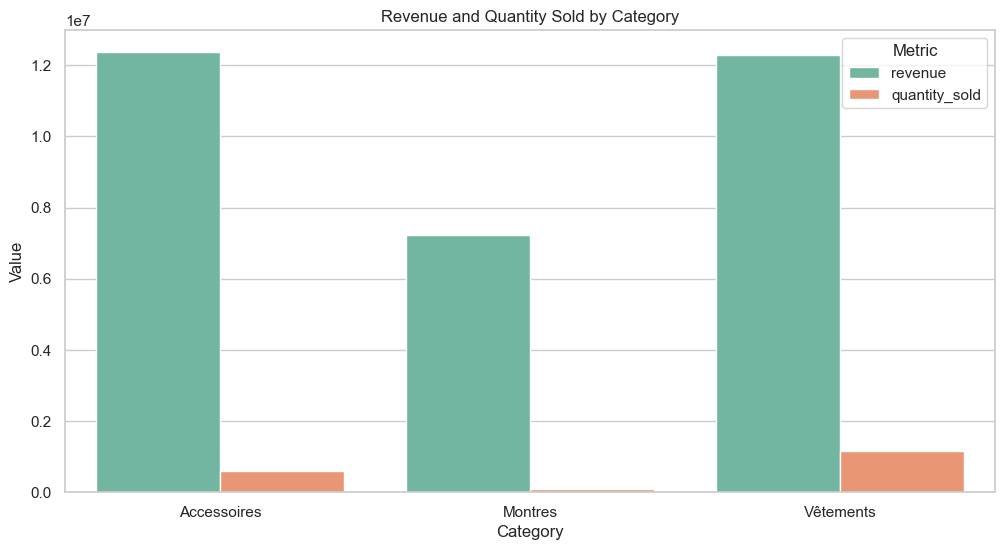

In [59]:

## Compare Multiple Metrics Side-by-Side
category_metrics = df_ventes_produits.groupby('category').agg({'revenue': 'sum', 'quantity_sold': 'sum'}).reset_index()

category_metrics_melt = category_metrics.melt(id_vars='category', value_vars=['revenue', 'quantity_sold'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(x='category', y='Value', hue='Metric', data=category_metrics_melt, palette='Set2')
plt.title('Revenue and Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.show()


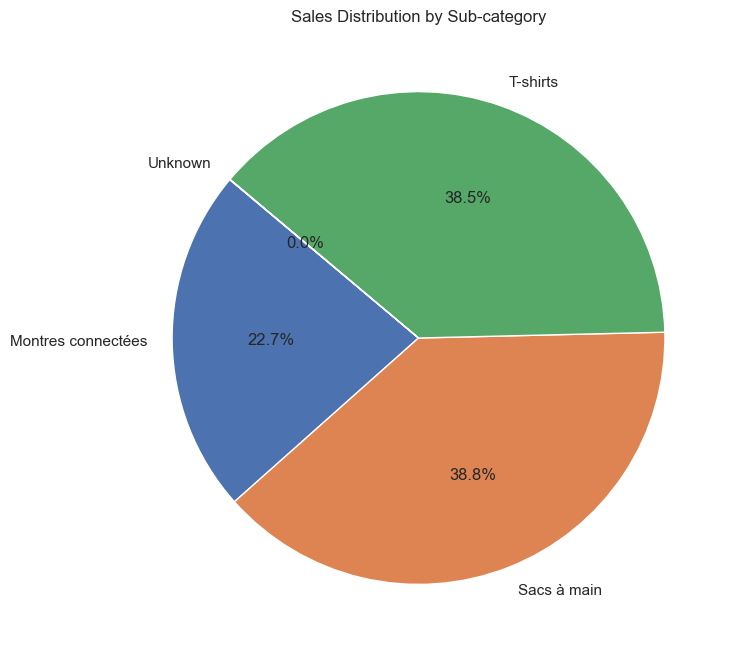

In [60]:
##Proportion of Sales by Sub-category
sub_category_sales = df_ventes_produits.groupby('sub_category')['revenue'].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(sub_category_sales['revenue'], labels=sub_category_sales['sub_category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Sub-category')
plt.show()


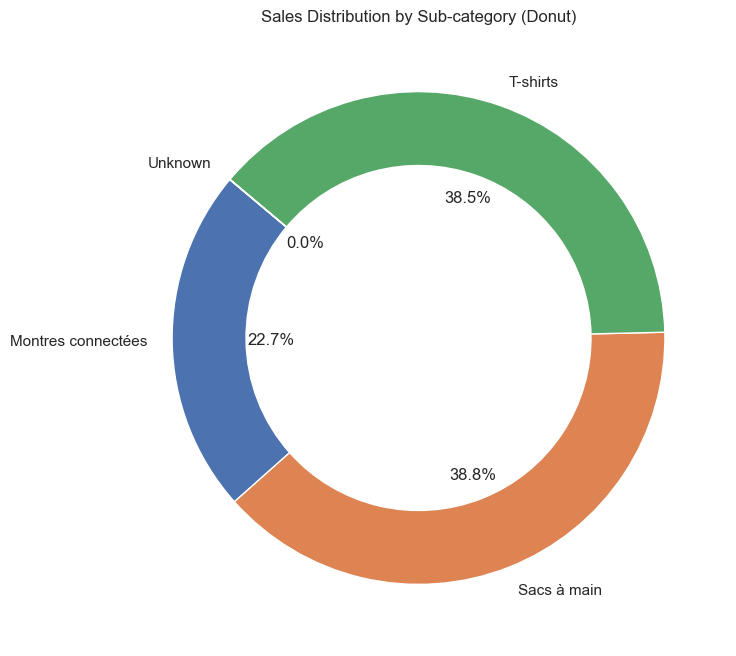

In [61]:
plt.figure(figsize=(8,8))
plt.pie(sub_category_sales['revenue'], labels=sub_category_sales['sub_category'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Sales Distribution by Sub-category (Donut)')
plt.show()


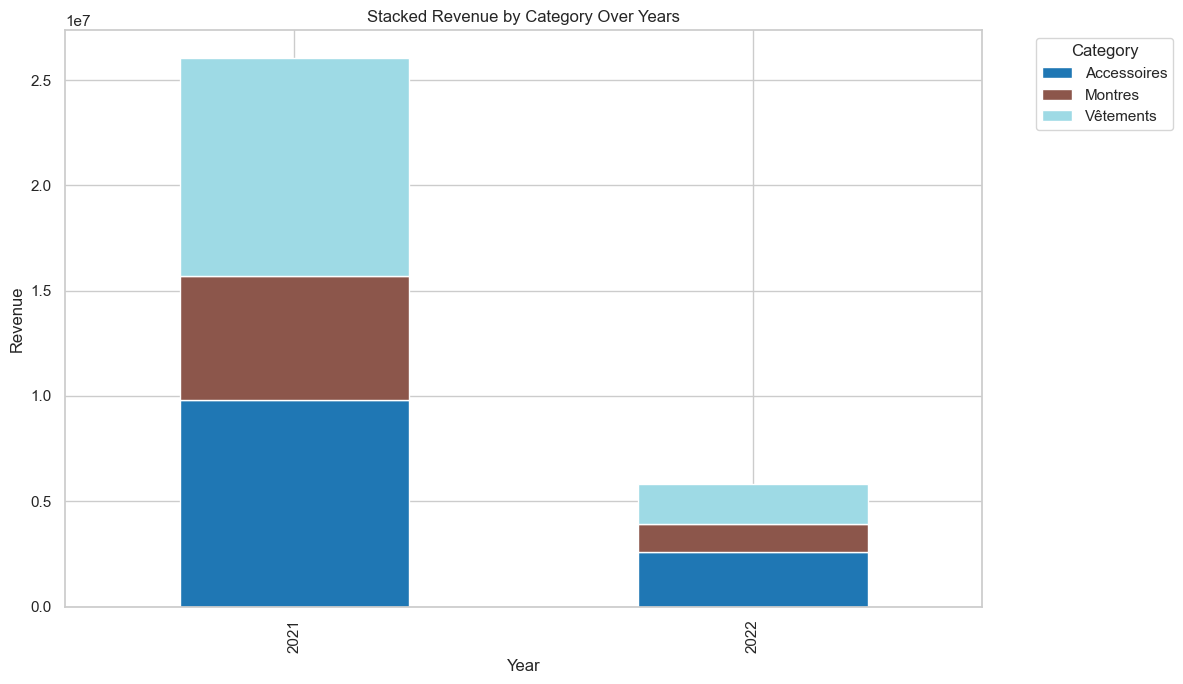

In [63]:
## Composition of Sales Within Categories Over Years
category_yearly = df_ventes_produits.groupby(['transaction_year', 'category'])['revenue'].sum().unstack().fillna(0)

category_yearly.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Stacked Revenue by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Distribution

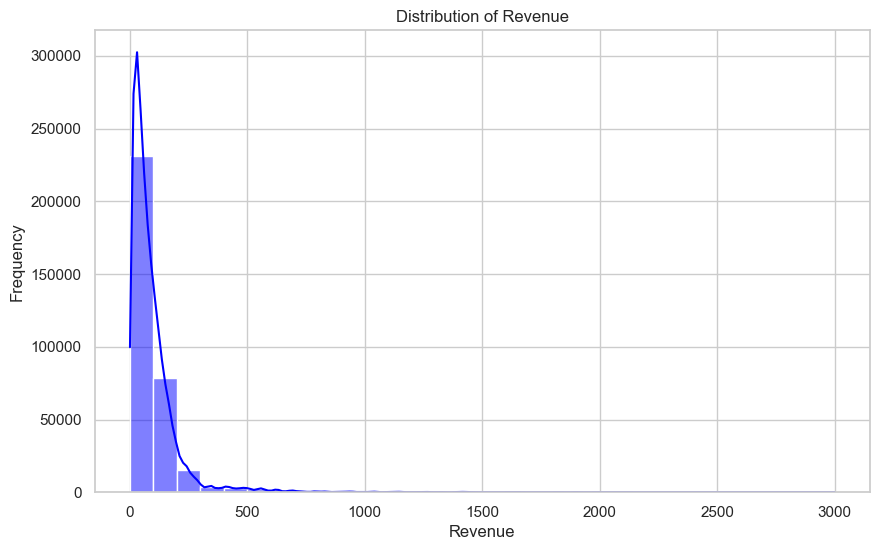

In [64]:
## Distribution of Revenue
plt.figure(figsize=(10,6))
sns.histplot(df_ventes_produits['revenue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\2806915269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='revenue', data=df, palette='Set3')


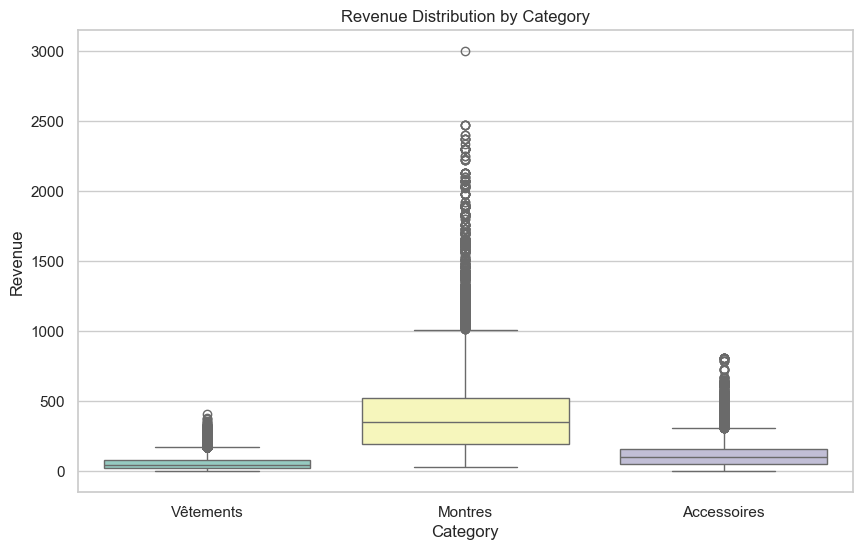

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='revenue', data=df_ventes_produits, palette='Set3')
plt.title('Revenue Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()


#### Relationship

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


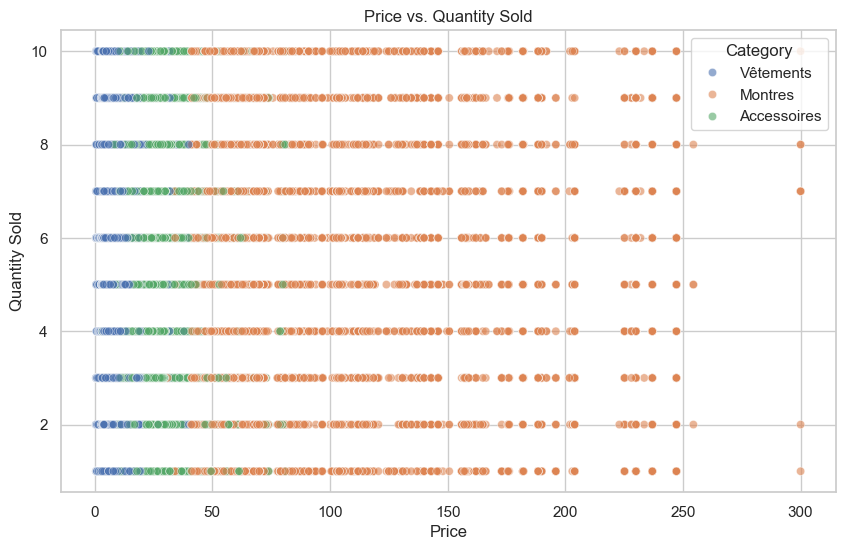

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='quantity_sold', data=df_ventes_produits, hue='category', alpha=0.6)
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.show()


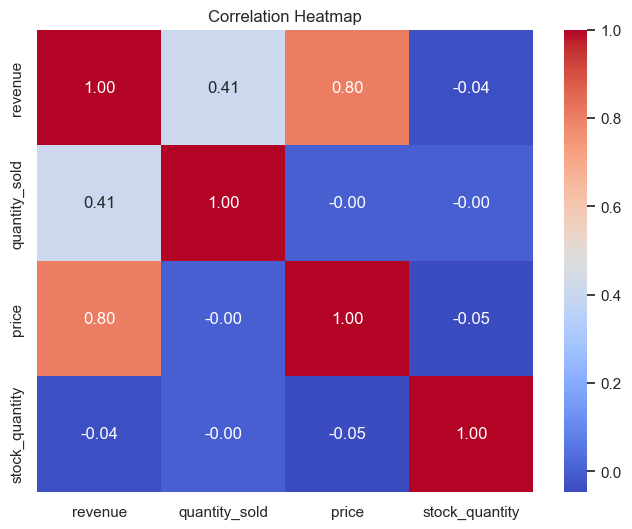

In [67]:
corr = df_ventes_produits[['revenue', 'quantity_sold', 'price', 'stock_quantity']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### more deep insights

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


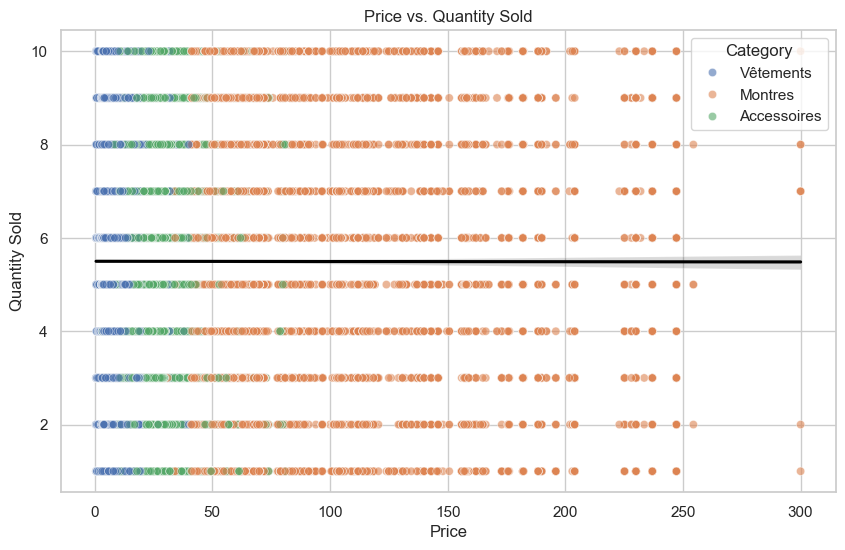

Correlation between Price and Quantity Sold: -0.00


In [70]:
## Price vs. Quantity Sold
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='quantity_sold', data=df_ventes_produits, hue='category', alpha=0.6)
sns.regplot(x='price', y='quantity_sold', data=df_ventes_produits, scatter=False, color='black')
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.show()

correlation = df['price'].corr(df_ventes_produits['quantity_sold'])
print(f"Correlation between Price and Quantity Sold: {correlation:.2f}")


C:\Users\HP\AppData\Local\Temp\ipykernel_72188\3091256042.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y='revenue', data=df_segmented, palette='Set3')


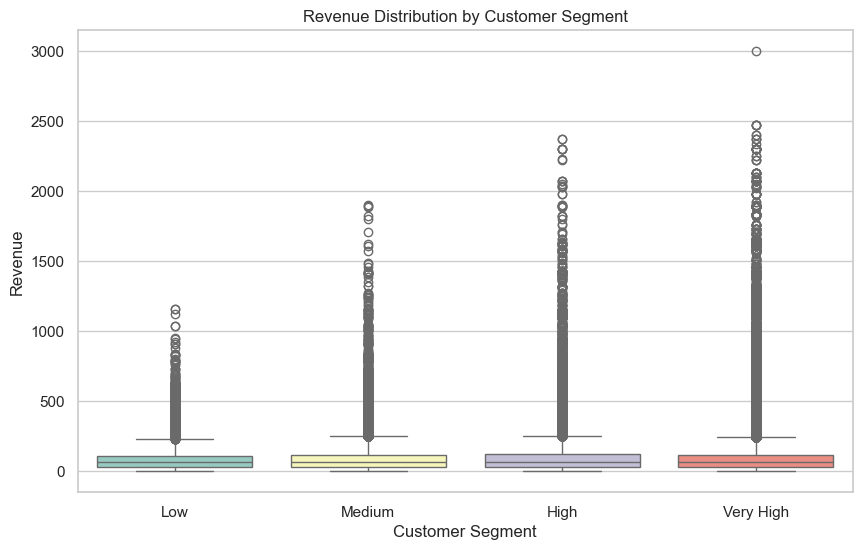

C:\Users\HP\AppData\Local\Temp\ipykernel_72188\3091256042.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_quantity = df_segmented.groupby('segment')['quantity_sold'].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_72188\3091256042.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='quantity_sold', data=segment_quantity, palette='Pastel1')


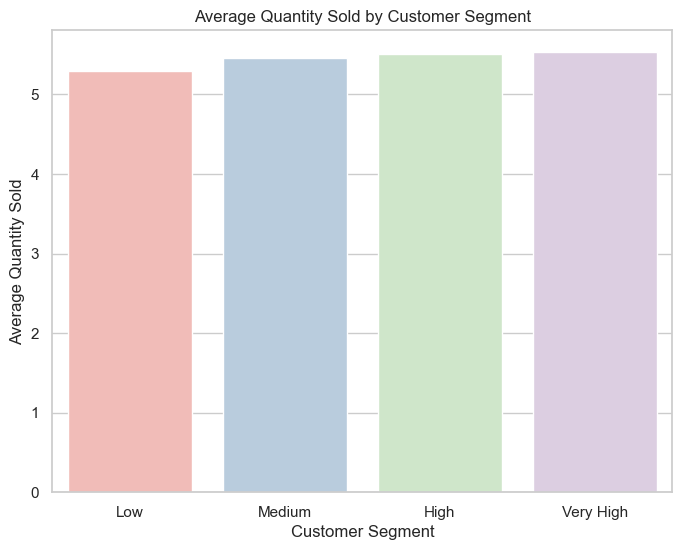

In [71]:
customer_clv = df_ventes_produits.groupby('client_id')['revenue'].sum().reset_index()
customer_clv['segment'] = pd.qcut(customer_clv['revenue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Merge with main dataframe
df_segmented = pd.merge(df, customer_clv[['client_id', 'segment']], on='client_id', how='left')

# Box Plot: Revenue by Customer Segment
plt.figure(figsize=(10,6))
sns.boxplot(x='segment', y='revenue', data=df_segmented, palette='Set3')
plt.title('Revenue Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue')
plt.show()

# Average Quantity Sold by Segment
segment_quantity = df_segmented.groupby('segment')['quantity_sold'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='segment', y='quantity_sold', data=segment_quantity, palette='Pastel1')
plt.title('Average Quantity Sold by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Quantity Sold')
plt.show()


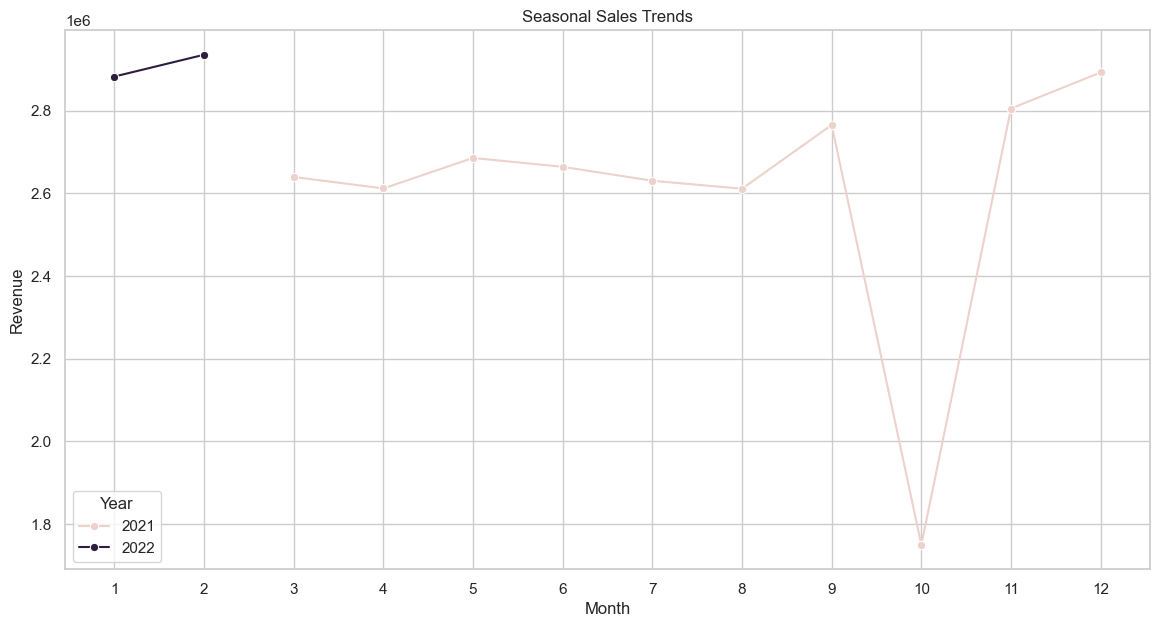

ModuleNotFoundError: No module named 'statsmodels'

In [72]:
# Extract Month and Year
df_ventes_produits['month'] = df_ventes_produits['date'].dt.month
df_ventes_produits['year'] = df_ventes_produits['date'].dt.year

# Monthly Revenue Trend
monthly_revenue = df_ventes_produits.groupby(['year', 'month'])['revenue'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(x='month', y='revenue', hue='year', data=monthly_revenue, marker='o')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.show()

# Seasonal Decomposition (Optional: Using statsmodels)
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate daily revenue
daily_revenue = df_ventes_produits.set_index('date').resample('D')['revenue'].sum()

# Decompose the time series
decomposition = seasonal_decompose(daily_revenue, model='additive', period=365)
decomposition.plot()
plt.show()


In [74]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.8 MB 24.4 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 23.5 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/44.5 MB 21.8 MB/s eta 0:00:02
   -------- ------------------------------- 9.2/44.5 MB 21.9 MB/s eta 0:00:02
   ------------ --------------------------- 13.9/44.5 MB 21.8 MB/s eta 0:00:02
   ---------------- ----------------------- 18.1/44.5 MB 21.5 MB/s eta 0:00:02
   -------------------- ------------------- 22.5/44.5 MB 21.0 MB/s eta 0:00:02
   -------------